In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [2]:
data = pd.read_csv('Main Data2.csv')

In [3]:
df = data.head()
df

,Walk Score (out of 100),Transit Score (out of 100),Bike Score (out of 100),Elementary School Score (out of 10),Middle School Score (out of 10),High School Score (out of 10),Price,Beds,Baths,Sq Ft,Monthly Payment,Year Built,HOA Dues,Lot Size,Garage Spaces,Tax Amount,Zip Code
0,52,43,60,4.0,4.0,1,699900,4,3.0,2123,4215.0,2022,0,"9,148",3,292,89108
1,67,41,50,6.0,2.0,3,219900,2,2.0,900,1553.0,1990,190,900,0,559,89108
2,56,41,46,4.0,7.0,1,385000,3,2.0,1249,2382.0,1975,0,"8,712",2,926,89107
3,66,42,51,5.0,4.0,1,299900,3,1.0,888,1842.0,1956,0,"5,227",0,552,89107
4,80,45,58,3.0,4.0,1,265000,2,1.0,832,1629.0,1947,0,"4,792",0,507,89101


In [4]:
df.nunique()
print(df.info(), df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Walk Score (out of 100)              5 non-null      int64  
 1   Transit Score (out of 100)           5 non-null      int64  
 2   Bike Score (out of 100)              5 non-null      int64  
 3   Elementary School Score (out of 10)  5 non-null      float64
 4   Middle School Score (out of 10)      5 non-null      float64
 5   High School Score (out of 10)        5 non-null      int64  
 6   Price                                5 non-null      int64  
 7   Beds                                 5 non-null      int64  
 8   Baths                                5 non-null      float64
 9   Sq Ft                                5 non-null      int64  
 10   Monthly Payment                     5 non-null      float64
 11  Year Built                          

In [5]:
df.describe()

,Walk Score (out of 100),Transit Score (out of 100),Bike Score (out of 100),Elementary School Score (out of 10),Middle School Score (out of 10),High School Score (out of 10),Price,Beds,Baths,Sq Ft,Monthly Payment,Year Built,HOA Dues,Garage Spaces,Tax Amount,Zip Code
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,64.200000,42.40000,53.000000,4.400000,4.200000,1.400000,373940.000000,2.80000,1.80000,1198.400000,2324.200000,1978.000000,38.000000,1.000000,567.200000,89106.200000
std,10.917875,1.67332,5.830952,1.140175,1.788854,0.894427,191996.361945,0.83666,0.83666,542.467787,1105.558094,29.723728,84.970583,1.414214,228.251396,2.949576
min,52.000000,41.00000,46.000000,3.000000,2.000000,1.000000,219900.000000,2.00000,1.00000,832.000000,1553.000000,1947.000000,0.000000,0.000000,292.000000,89101.000000
25%,56.000000,41.00000,50.000000,4.000000,4.000000,1.000000,265000.000000,2.00000,1.00000,888.000000,1629.000000,1956.000000,0.000000,0.000000,507.000000,89107.000000
50%,66.000000,42.00000,51.000000,4.000000,4.000000,1.000000,299900.000000,3.00000,2.00000,900.000000,1842.000000,1975.000000,0.000000,0.000000,552.000000,89107.000000
75%,67.000000,43.00000,58.000000,5.000000,4.000000,1.000000,385000.000000,3.00000,2.00000,1249.000000,2382.000000,1990.000000,0.000000,2.000000,559.000000,89108.000000
max,80.000000,45.00000,60.000000,6.000000,7.000000,3.000000,699900.000000,4.00000,3.00000,2123.000000,4215.000000,2022.000000,190.000000,3.000000,926.000000,89108.000000


In [6]:
df.columns

Index(['Walk Score (out of 100)', 'Transit Score (out of 100)',
       'Bike Score (out of 100)', 'Elementary School Score (out of 10)',
       'Middle School Score (out of 10)', 'High School Score (out of 10)',
       'Price', 'Beds', 'Baths', 'Sq Ft', ' Monthly Payment', 'Year Built',
       'HOA Dues', 'Lot Size', 'Garage Spaces', 'Tax Amount', 'Zip Code'],
      dtype='object')

In [7]:
data.shape

(1908, 17)

C:\Users\bmehboob\AppData\Local\Temp\ipykernel_20232\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

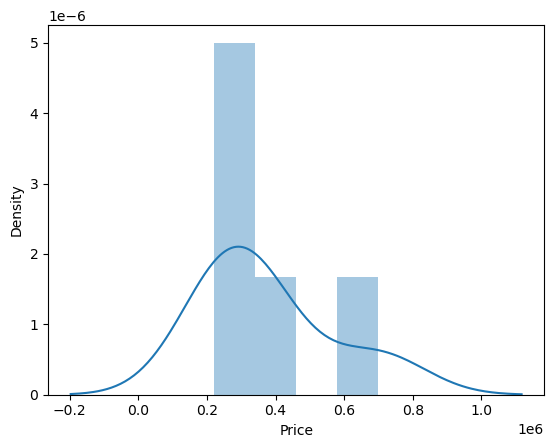

In [8]:
sns.distplot(df['Price'])

C:\Users\bmehboob\AppData\Local\Temp\ipykernel_20232\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

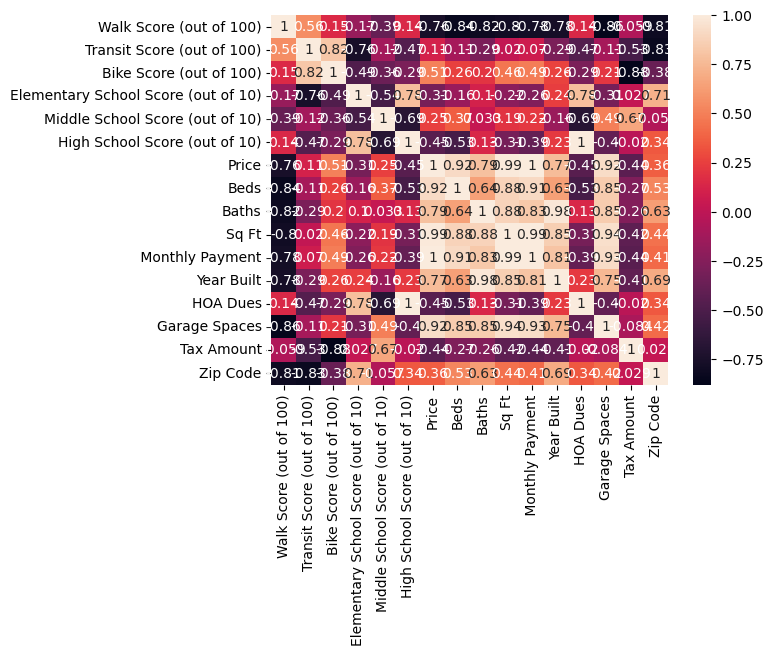

In [9]:
sns.heatmap(df.corr(), annot = True)

In [10]:
df.isna().sum()

Walk Score (out of 100)                0
Transit Score (out of 100)             0
Bike Score (out of 100)                0
Elementary School Score (out of 10)    0
Middle School Score (out of 10)        0
High School Score (out of 10)          0
Price                                  0
Beds                                   0
Baths                                  0
Sq Ft                                  0
 Monthly Payment                       0
Year Built                             0
HOA Dues                               0
Lot Size                               0
Garage Spaces                          0
Tax Amount                             0
Zip Code                               0
dtype: int64

In [11]:
df = df.dropna(how = 'any', axis = 0)

In [12]:
df.columns

Index(['Walk Score (out of 100)', 'Transit Score (out of 100)',
       'Bike Score (out of 100)', 'Elementary School Score (out of 10)',
       'Middle School Score (out of 10)', 'High School Score (out of 10)',
       'Price', 'Beds', 'Baths', 'Sq Ft', ' Monthly Payment', 'Year Built',
       'HOA Dues', 'Lot Size', 'Garage Spaces', 'Tax Amount', 'Zip Code'],
      dtype='object')

In [13]:
df = data[['Walk Score (out of 100)', 'Transit Score (out of 100)',
           'Bike Score (out of 100)', 'Elementary School Score (out of 10)',
           'Middle School Score (out of 10)', 'High School Score (out of 10)',
           'Price', 'Beds', 'Baths', 'Sq Ft', ' Monthly Payment', 'Year Built',
           'HOA Dues', 'Lot Size', 'Garage Spaces', 'Tax Amount', 'Zip Code']]


C:\Users\bmehboob\AppData\Local\Temp\ipykernel_20232\1641777290.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")


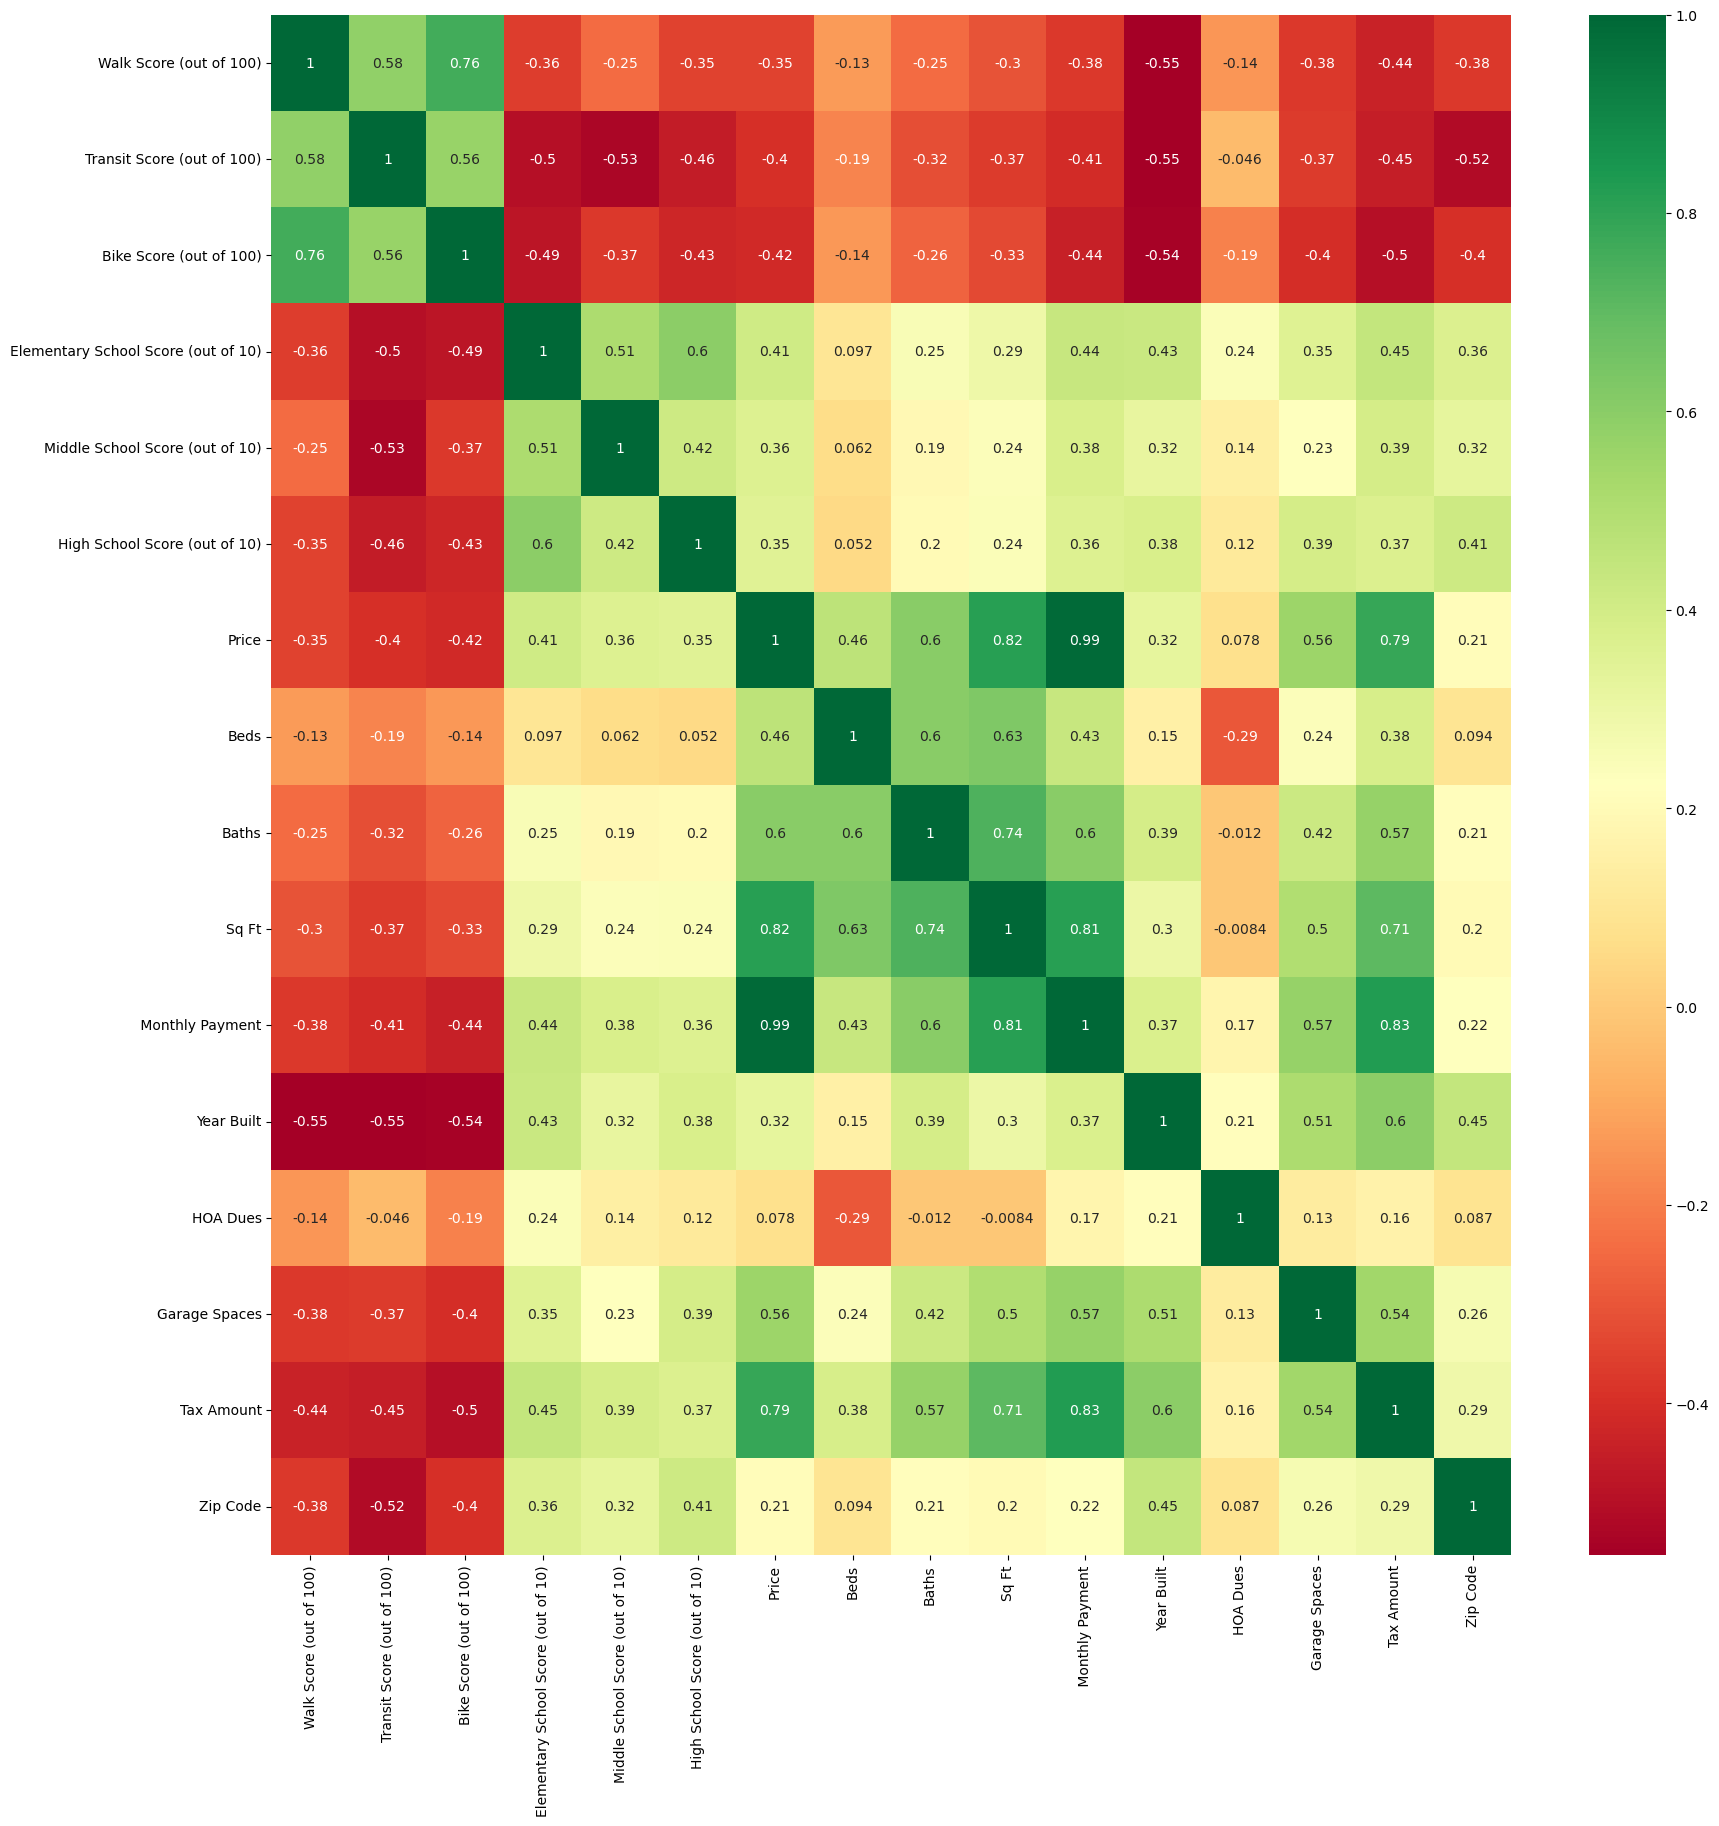

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [15]:

# Findings from the Correlation Heatmap:

# The correlation heatmap visually represents the relationships between different features in the dataset.

# 1. Positive correlations:
#    - 'Price' has a strong positive correlation with 'Baths' and 'Sq Ft', indicating that as these values increase, the price tends to increase as well.
#    - 'Beds' also show a positive correlation with 'Price', although slightly weaker than 'Baths' and 'Sq Ft'.
#    - 'Garage Spaces' have a moderate positive correlation with 'Price'.

# 2. Negative correlations:
#    - 'Walk Score (out of 100)' and 'Transit Score (out of 100)' have negative correlations with 'Price', suggesting that higher walk and transit scores are associated with lower prices.
#    - 'Year Built' has a negative correlation with 'Price', indicating that older properties tend to have lower prices.

# 3. Other observations:
#    - There are no strong correlations between 'Price' and 'Elementary School Score', 'Middle School Score', or 'High School Score'.
#    - Features such as 'Lot Size', 'Tax Amount', and 'HOA Dues' do not show strong correlations with 'Price'.

# This information can be valuable when selecting features for a predictive model or understanding the factors that influence property prices.


In [16]:
data['Price'].describe()

count      1908.000000
mean     496381.819706
std      178822.543542
min      130000.000000
25%      370000.000000
50%      449894.000000
75%      590330.750000
max      999999.000000
Name: Price, dtype: float64

In [17]:
df.head()

,Walk Score (out of 100),Transit Score (out of 100),Bike Score (out of 100),Elementary School Score (out of 10),Middle School Score (out of 10),High School Score (out of 10),Price,Beds,Baths,Sq Ft,Monthly Payment,Year Built,HOA Dues,Lot Size,Garage Spaces,Tax Amount,Zip Code
0,52,43,60,4.0,4.0,1,699900,4,3.0,2123,4215.0,2022,0,"9,148",3,292,89108
1,67,41,50,6.0,2.0,3,219900,2,2.0,900,1553.0,1990,190,900,0,559,89108
2,56,41,46,4.0,7.0,1,385000,3,2.0,1249,2382.0,1975,0,"8,712",2,926,89107
3,66,42,51,5.0,4.0,1,299900,3,1.0,888,1842.0,1956,0,"5,227",0,552,89107
4,80,45,58,3.0,4.0,1,265000,2,1.0,832,1629.0,1947,0,"4,792",0,507,89101


<Axes: xlabel='Price', ylabel='Sq Ft'>

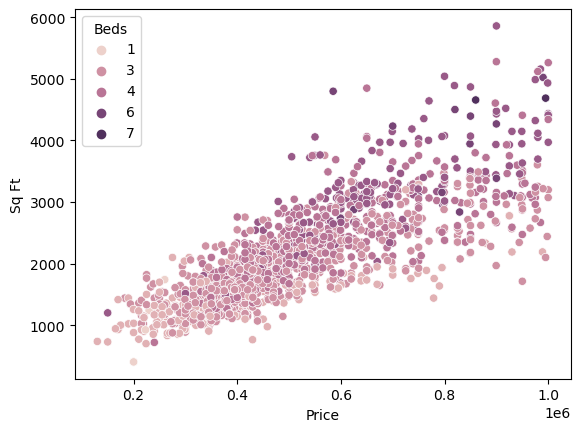

In [18]:
sns.scatterplot(x=df['Price'],y=df['Sq Ft'],hue=df['Beds'])

In [19]:
#interpret finding above
# Interpretation of the scatterplot:
# The scatterplot displays the relationship between 'Price' and 'Sq Ft' while distinguishing data points by the number of 'Beds' using colors.
# Each point on the plot represents a property in the dataset.

# Key Findings:
# - The x-axis represents 'Price', and the y-axis represents 'Sq Ft' (square footage of the property).
# - The color of each point indicates the number of bedrooms ('Beds') in the property.

# Observations:
# - There is a general trend of properties with larger square footage ('Sq Ft') having higher prices ('Price').
# - The majority of properties with 2 to 4 bedrooms ('Beds') fall within the lower to mid-price range.
# - Some outliers can be observed, where properties with a relatively smaller square footage have higher prices, possibly due to other factors like location or amenities.
# - There is a mix of property prices within each bedroom category, indicating that the number of bedrooms alone does not determine the price.

# Overall, this scatterplot helps us understand the relationship between price, square footage, and the number of bedrooms, providing insights into how these factors interact in determining property prices.


<Axes: ylabel='Price'>

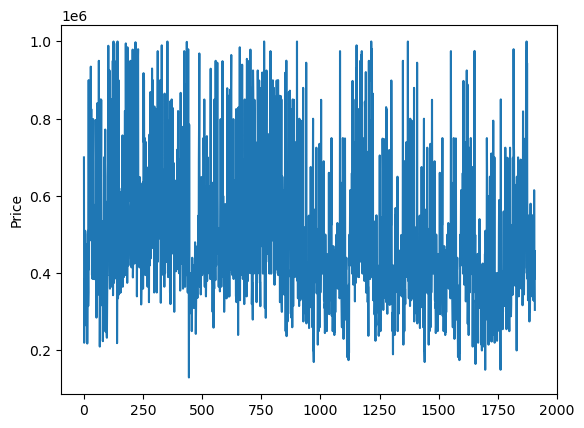

In [20]:
sns.lineplot(data=df['Price'])

In [21]:
#interpret this finding
# Interpretation of the line plot:
# The line plot displays the trend of 'Price' over some continuous variable (possibly time), as it uses a line to connect data points.
# The data points on the plot likely represent changes in 'Price' over a specific period or sequence.
# Since only 'Price' data is provided without specifying the x-axis variable, we may assume it represents the sequential order of data points.

# Key Findings:
# - The line plot visualizes the change in 'Price' over time or some other continuous variable.

# Observations:
# - Without knowledge of the x-axis variable, it's challenging to make specific observations about the trend.

# This line plot is a useful tool for visualizing trends in 'Price' data over a continuous variable, but additional context about the x-axis variable is needed for a more detailed interpretation.



In [22]:
data.head()

,Walk Score (out of 100),Transit Score (out of 100),Bike Score (out of 100),Elementary School Score (out of 10),Middle School Score (out of 10),High School Score (out of 10),Price,Beds,Baths,Sq Ft,Monthly Payment,Year Built,HOA Dues,Lot Size,Garage Spaces,Tax Amount,Zip Code
0,52,43,60,4.0,4.0,1,699900,4,3.0,2123,4215.0,2022,0,"9,148",3,292,89108
1,67,41,50,6.0,2.0,3,219900,2,2.0,900,1553.0,1990,190,900,0,559,89108
2,56,41,46,4.0,7.0,1,385000,3,2.0,1249,2382.0,1975,0,"8,712",2,926,89107
3,66,42,51,5.0,4.0,1,299900,3,1.0,888,1842.0,1956,0,"5,227",0,552,89107
4,80,45,58,3.0,4.0,1,265000,2,1.0,832,1629.0,1947,0,"4,792",0,507,89101


In [23]:
data.shape

(1908, 17)

In [24]:
data.to_csv("After_EDA.csv")